In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import glob

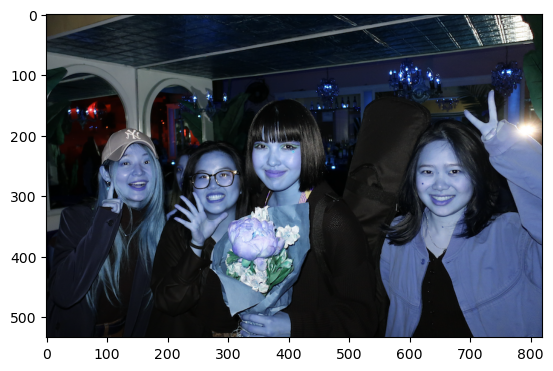

In [4]:
test_image = cv2.imread('hehe.png')

plt.imshow(test_image)

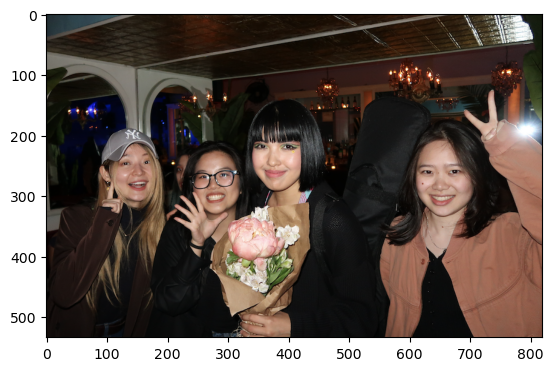

In [5]:
test_RGB=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_RGB)

In [6]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
haar_cascade_face = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
faces_rects = haar_cascade_face.detectMultiScale(test_image, scaleFactor = 1.2, minNeighbors = 2);

print('Faces found: ', len(faces_rects))

Faces found:  4


In [9]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (190, 105, 220), 5)
        

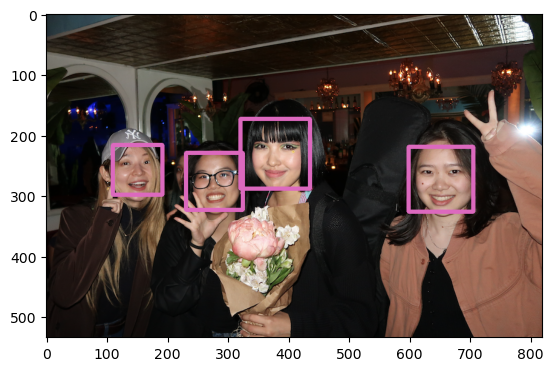

In [10]:
plt.imshow(convertToRGB(test_image))

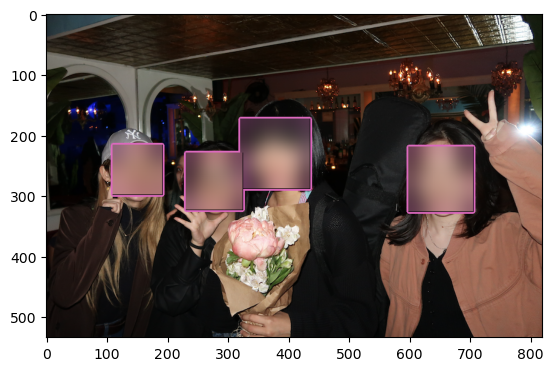

In [11]:
image_copy = test_image.copy()

for (x, y, w, h) in faces_rects:
    cv2.rectangle(image_copy, (x, y), (x+w, y+h), 2)
    rect_color = image_copy[y:y+h, x:x+w]
    blur = cv2.GaussianBlur(rect_color, (101,101), 0)        
    image_copy[y:y+h, x:x+w] = blur      
    
    plt.imshow(convertToRGB(image_copy))

In [28]:
def blur_faces(cascade, test_image, scaleFactor = 1.2):
    image_copy = test_image.copy()
    
    faces_rect = cascade.detectMultiScale(image_copy, scaleFactor=scaleFactor, minNeighbors=2)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), 5)
        rect_color = image_copy[y:y+h, x:x+w]
        blur = cv2.GaussianBlur(rect_color, (101,101), 0)        
        image_copy[y:y+h, x:x+w] = blur            
        
    return image_copy

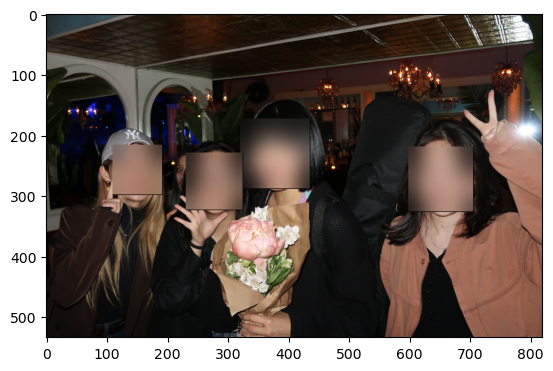

In [30]:
#loading image
test_image2 = cv2.imread('hehe.png')

#call the function to detect faces
faces = blur_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

In [35]:
img_dir = "testimages"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

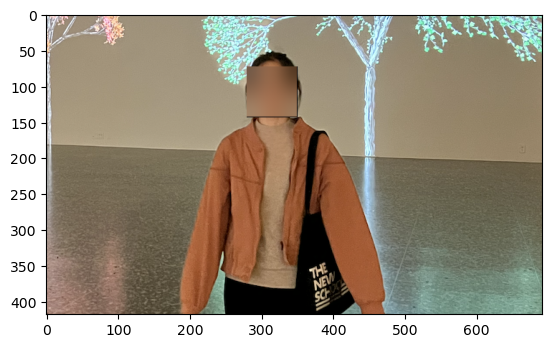

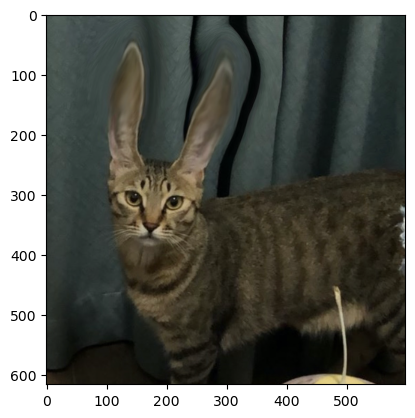

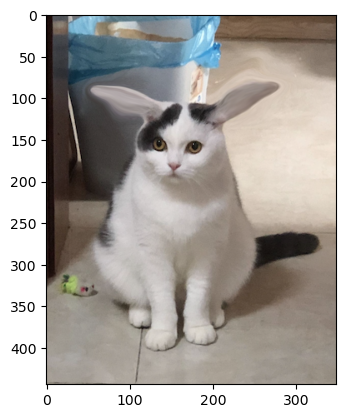

In [36]:
for x in range(len(data)):
    pics = blur_faces(haar_cascade_face, data[x])
    plt.figure()
    plt.imshow(convertToRGB(pics))